In [26]:
# Importing Dependencies
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.preprocessing import MinMaxScaler

In [28]:
# reading csv file
data_df = pd.read_csv("data/music_data.csv")
data_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature,genre,song_name,duration_min
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,4,Dark Trap,Mercury: Retrograde,2.075650
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,4,Dark Trap,Pathology,3.740450
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,4,Dark Trap,Symbiote,1.647017
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),2.061017
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,4,Dark Trap,Venom,2.054967


In [29]:
# Checking the data type

data_df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
id                   object
time_signature        int64
genre                object
song_name            object
duration_min        float64
dtype: object

In [30]:
data_df.shape

(21519, 16)

In [31]:
 # choosing the features for our analysis

chosen_cols = ['danceability', 'energy', 'loudness', 'speechiness', 
                         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

real_df = data_df[chosen_cols].copy()

real_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.831,0.814,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,156.985
1,0.719,0.493,-7.230,0.0794,0.4010,0.000000,0.1180,0.1240,115.080
2,0.850,0.893,-4.783,0.0623,0.0138,0.000004,0.3720,0.0391,218.050
3,0.476,0.781,-4.710,0.1030,0.0237,0.000000,0.1140,0.1750,186.948
4,0.798,0.624,-7.668,0.2930,0.2170,0.000000,0.1660,0.5910,147.988


In [32]:
# Displaying our statistic summary

real_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000
mean,0.674583,0.657252,-7.039576,0.178072,0.167282,0.075957,0.195378,0.417385,151.480713
std,0.159427,0.175719,2.906579,0.140648,0.208450,0.220703,0.151472,0.233708,29.137425
min,0.065100,0.000243,-33.357000,0.022700,0.000001,0.000000,0.021000,0.020600,57.967000
25%,0.566000,0.535000,-8.645500,0.056850,0.016800,0.000000,0.101000,0.223000,129.961000
50%,0.697000,0.660000,-6.687000,0.133000,0.080000,0.000001,0.130000,0.401000,149.648000
75%,0.796000,0.792000,-5.049500,0.277000,0.239000,0.000713,0.250000,0.593000,174.029000
max,0.988000,0.999000,3.148000,0.946000,0.988000,0.989000,0.973000,0.980000,220.290000


In [33]:
# Displaying the Correlations between each of attributes

real_df.corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,-0.205509,-0.059944,0.191643,-0.044994,-0.214672,-0.127341,0.309665,-0.080899
energy,-0.205509,1.000000,0.699971,0.030433,-0.389546,-0.010044,0.224582,0.245327,0.054210
loudness,-0.059944,0.699971,1.000000,-0.012122,-0.304527,-0.202542,0.140036,0.213404,0.035041
speechiness,0.191643,0.030433,-0.012122,1.000000,0.019342,-0.241072,0.101840,0.223742,0.111887
acousticness,-0.044994,-0.389546,-0.304527,0.019342,1.000000,-0.017739,-0.093321,-0.012468,-0.022751
instrumentalness,-0.214672,-0.010044,-0.202542,-0.241072,-0.017739,1.000000,-0.029965,-0.280156,-0.054799
liveness,-0.127341,0.224582,0.140036,0.101840,-0.093321,-0.029965,1.000000,0.067636,0.017724
valence,0.309665,0.245327,0.213404,0.223742,-0.012468,-0.280156,0.067636,1.000000,0.103554
tempo,-0.080899,0.054210,0.035041,0.111887,-0.022751,-0.054799,0.017724,0.103554,1.000000


In the heatmap, the positive value means that the two attributes have positive correlation between them
the colors are darker or lighter based on the value in the interval(-1,1) 


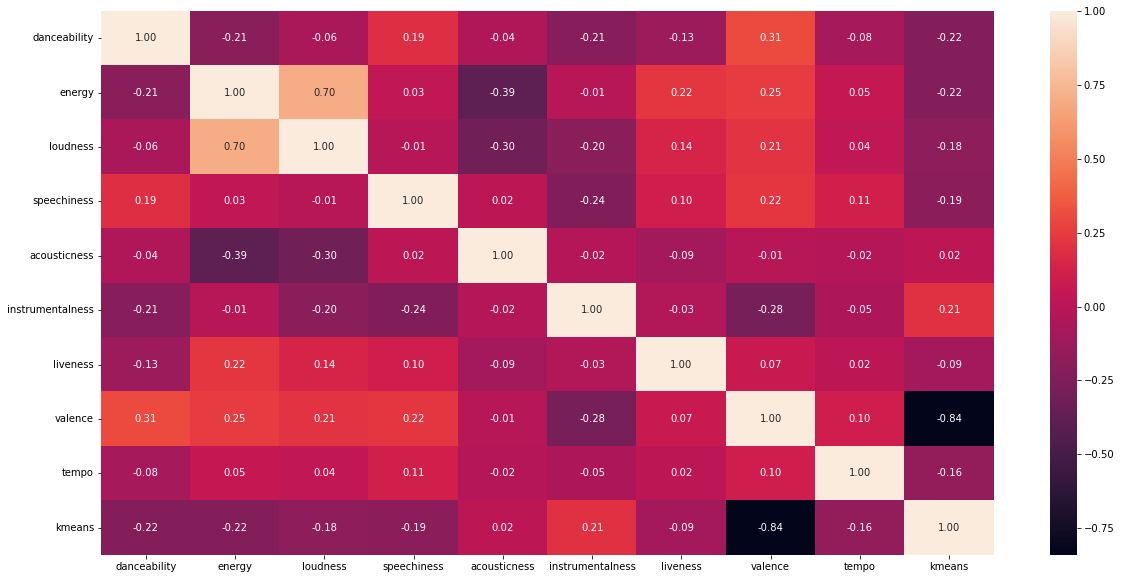

In [46]:
# Plotting data's heatmap with annotation
plt.figure(figsize=(20,10))

# Displaying heatmap
sns.heatmap(real_df.corr(), annot=True, fmt='.2f')
print("In the heatmap, the positive value means that the two attributes have positive correlation between them")
print("the colors are darker or lighter based on the value in the interval(-1,1) ")

plt.savefig("image/heatmap.png")

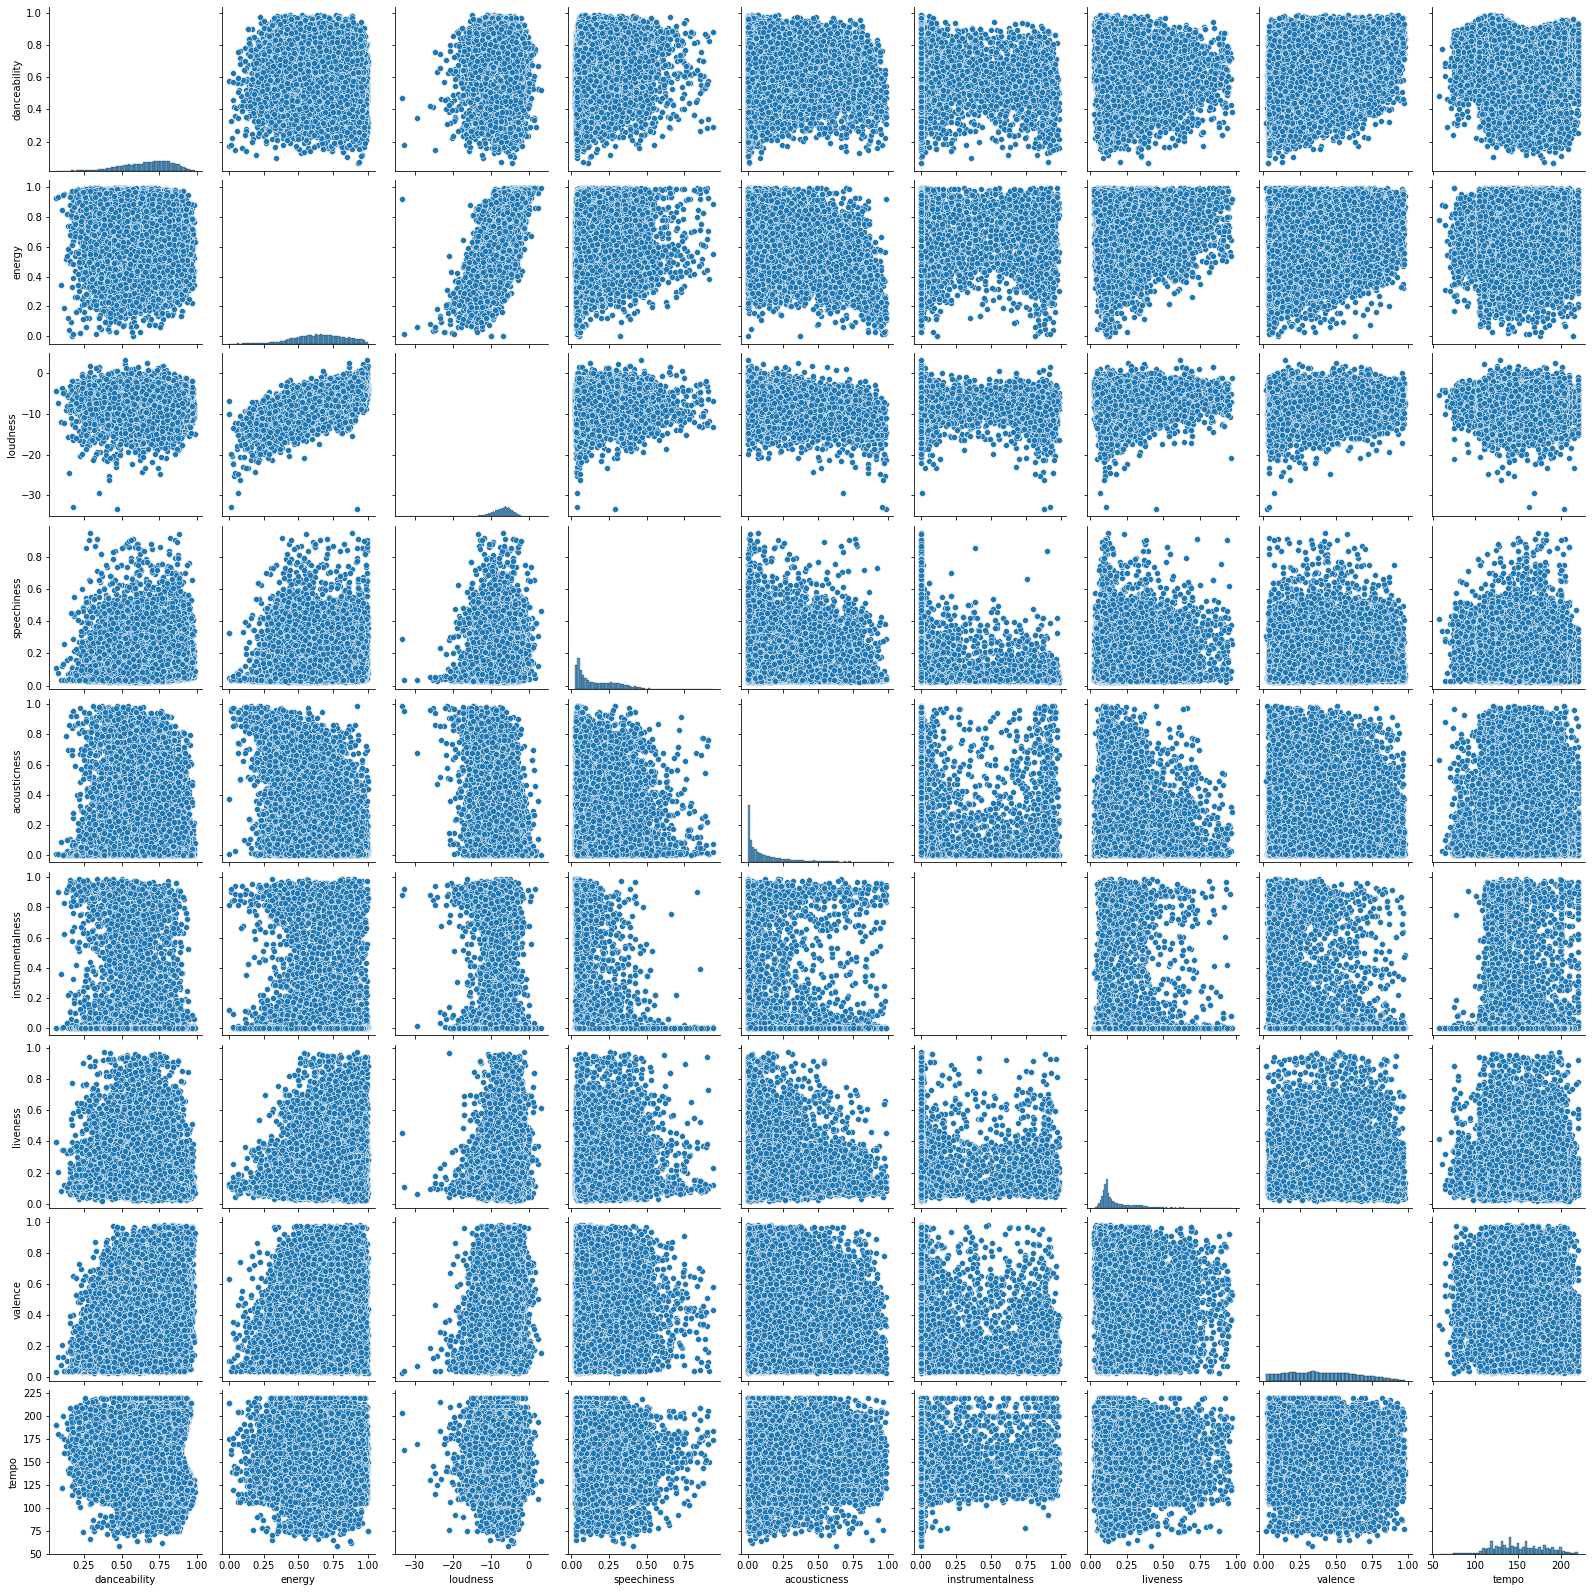

In [35]:
# Representing the data in a pairplot

sns.pairplot(real_df)
plt.savefig("image/pairplot")

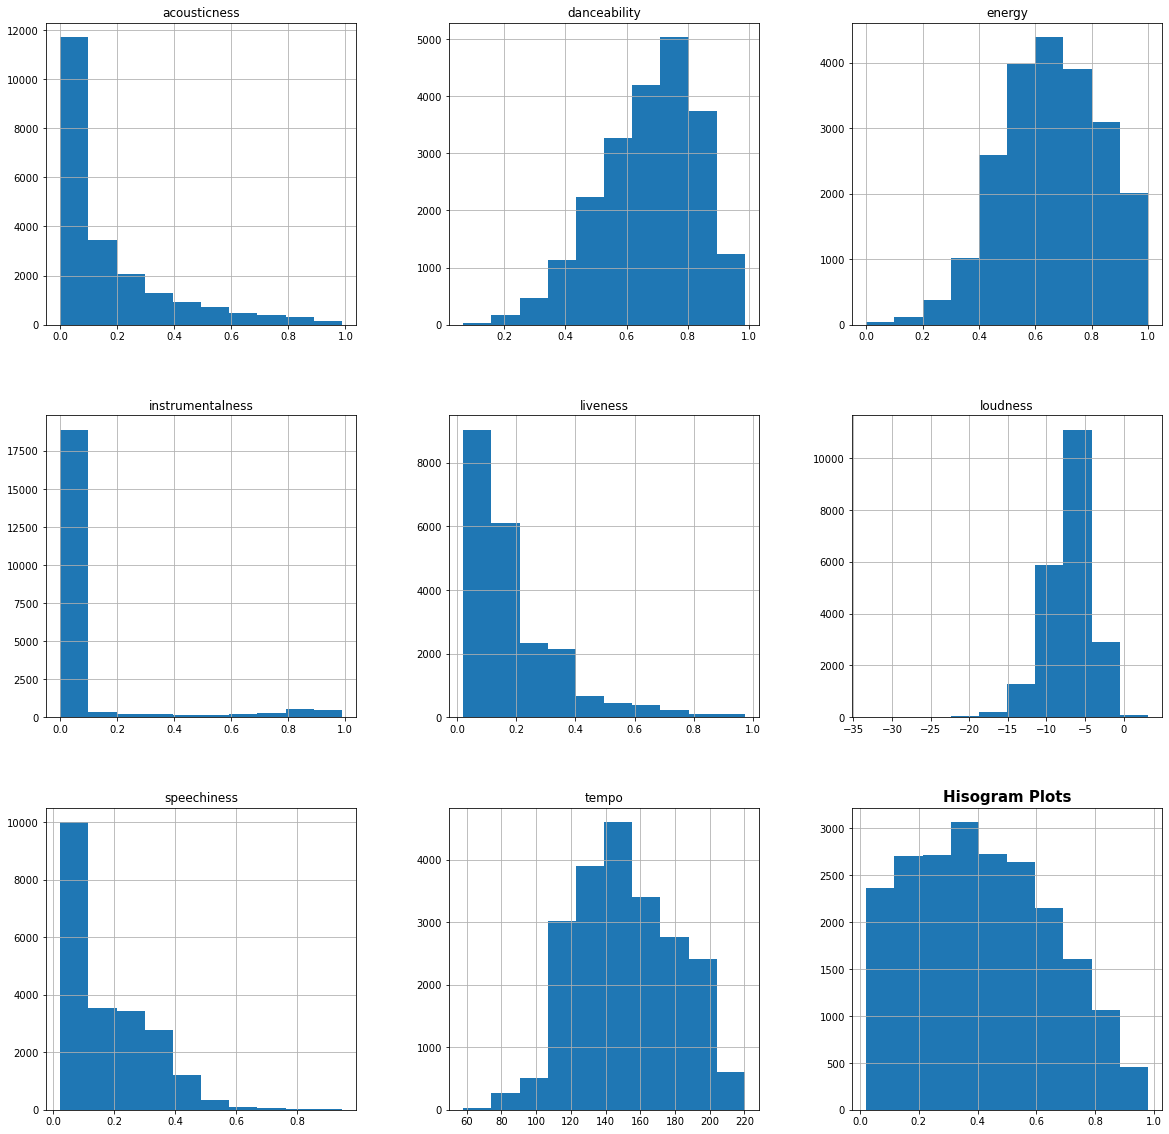

In [36]:
# Representing the data in a histogram

real_df.hist(figsize=(20,20))
plt.title("Hisogram Plots", size=15, weight='bold')
plt.savefig("image/hist")

### Comparing each of the attributes with Energy

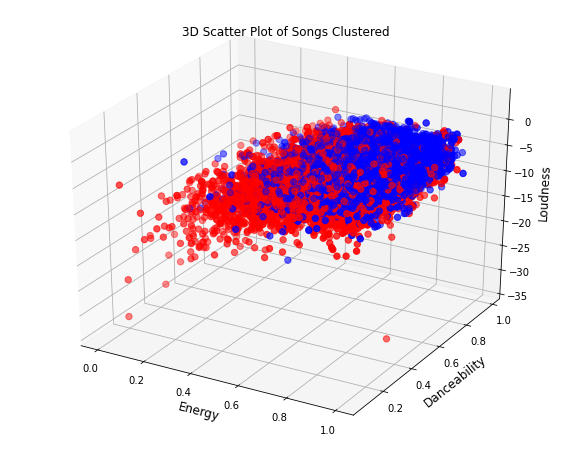

In [37]:
# Comparing the Attributes

col_features = real_df.columns[6:]
X = MinMaxScaler().fit_transform(real_df[col_features])
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)
real_df['kmeans'] = kmeans.labels_
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = real_df['energy']
y = real_df['danceability']
z = real_df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z, c=real_df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

plt.savefig("image/3D_scatter")

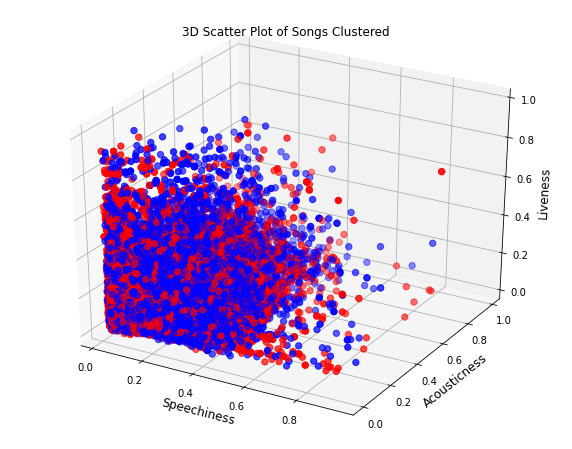

In [38]:
# Comparing the Attributes

col_features = real_df.columns[6:]
X = MinMaxScaler().fit_transform(real_df[col_features])
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)
real_df['kmeans'] = kmeans.labels_
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = real_df['speechiness']
y = real_df['acousticness']
z = real_df['liveness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z, c=real_df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Speechiness',fontsize=12)
ax.set_ylabel('Acousticness',fontsize=12)
ax.set_zlabel('Liveness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

plt.savefig("image/3D_scatter2")

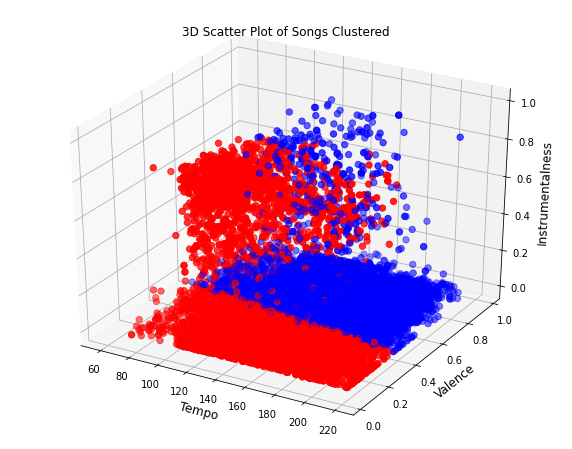

In [39]:
# Comparing the Attributes

col_features = real_df.columns[6:]
X = MinMaxScaler().fit_transform(real_df[col_features])
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)
real_df['kmeans'] = kmeans.labels_
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = real_df['tempo']
y = real_df['valence']
z = real_df['instrumentalness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z, c=real_df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Tempo',fontsize=12)
ax.set_ylabel('Valence',fontsize=12)
ax.set_zlabel('Instrumentalness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

plt.savefig("image/3D_scatter3")

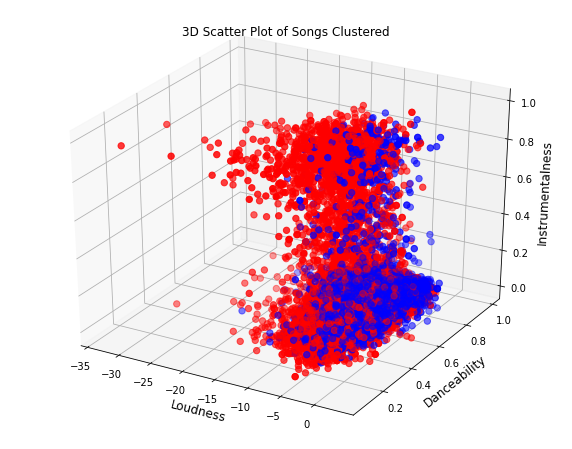

In [40]:
# Comparing the Attributes

col_features = real_df.columns[6:]
X = MinMaxScaler().fit_transform(real_df[col_features])
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)
real_df['kmeans'] = kmeans.labels_
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = real_df['loudness']
y = real_df['danceability']
z = real_df['instrumentalness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z, c=real_df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Loudness',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Instrumentalness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

plt.savefig("image/3D_scatter4")